In [7]:
import os
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For the WFD footprint definitions
from lsst.sims.featureScheduler import utils as schedUtils

In [18]:
# To calculate metrics with MAF
import lsst.sims.maf.db as db
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

In [4]:
dbfile = '/Users/lynnej/opsim/db/baseline_v1.3_10yrs.db'
opsdb = db.OpsimDatabase(dbfile)

In [6]:
# Let's count the visits .. 
metric = metrics.CountMetric('observationStartMJD', metricName='nvisits')

In [12]:
# .. over the WFD region - so define the WFD footprint first.
nside = 64
wfd_standard = schedUtils.WFD_no_gp_healpixels(nside, dec_max=2.5, dec_min=-62.5)
wfd_bigdust = schedUtils.WFD_no_dust_healpixels(nside, dec_max=12.25, dec_min=-72.5, dust_limit=0.19)

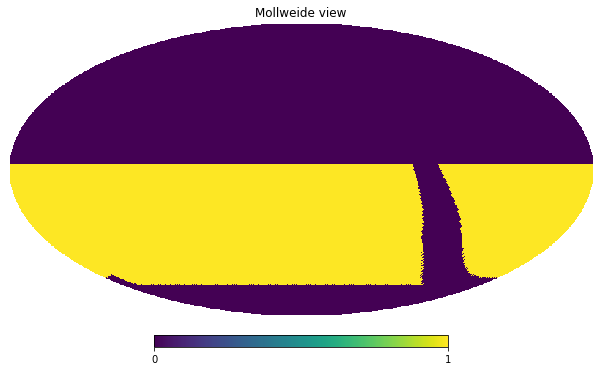

In [15]:
hp.mollview(wfd_standard)

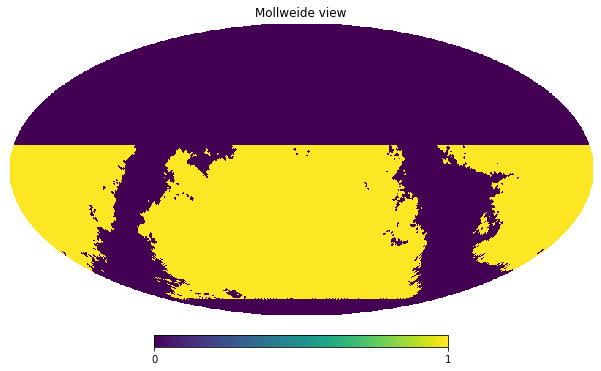

In [14]:
hp.mollview(wfd_bigdust)

In [16]:
# we'll use the standard WFD here, as that is what was used with the baseline.
slicer = slicers.HealpixSubsetSlicer(nside, np.where(wfd_standard==1)[0])

HealpixSubsetSlicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [17]:
# And we will skip DD visits, so add a constraint to avoid them.
constraint = 'note not like "DD%"'

In [19]:
bundle = mb.MetricBundle(metric, slicer, constraint, metadata='WFD only')

In [21]:
g = mb.MetricBundleGroup({'0': bundle}, opsdb, outDir='temp')
g.runAll()

Querying database SummaryAllProps with constraint note not like "DD%" for columns ['fieldRA', 'observationStartMJD', 'fieldDec']
Found 1976505 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 219 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 896.466  dipole: lon: -119.811, lat: -22.4664, amp: 24.808


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

/Users/lynnej/lsst_stack/stack/miniconda3-4.7.10-4d7b902/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


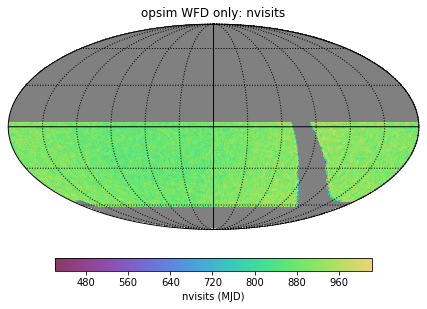

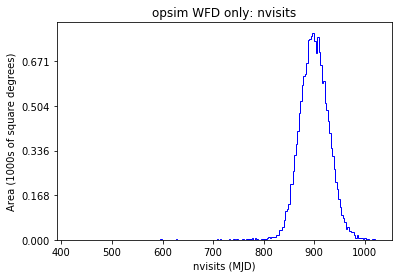

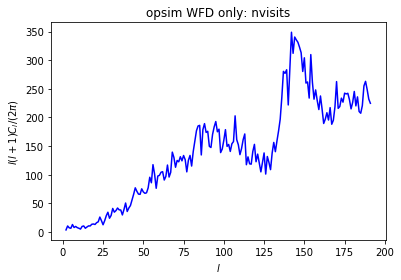

In [22]:
# Let's look at the plots - you get the standard healpix SkyMap, Area Histogram, and powerspectrum. 
bundle.plot()

In [23]:
# We can also add some summary statistics, which will only be calculated over the WFD footprint (obviously).
bundle.setSummaryMetrics(batches.extendedSummary())
bundle.computeSummaryStats()

In [27]:
# Look at the summary values calculated - pandas DataFrame makes a nice view
pd.DataFrame(bundle.summaryValues, index=['Baseline WFD'])

,Mean,Rms,Median,Count,Max,Min,N(+3Sigma),N(-3Sigma),25th%ile,75th%ile
Baseline WFD,899.090274,30.068647,899.0,21191,1023.0,421.0,39,85,880.0,918.0
